In [9]:
import numpy as np
import scipy
from scipy import misc
from skimage.transform import radon, iradon,iradon_sart
from skimage.draw import line_aa
import cv2
from PIL import Image
from PIL import ImageDraw
import matplotlib.pyplot as plt
import sewar
%matplotlib inline

In [19]:
img = cv2.imread("../images/women2.png",1)

# img = scipy.ndimage.rotate(img, 23)
imgo = np.copy(img)
img = cv2.resize(img,(480,480))
# img = np.ones((480,480), dtype='uint8')*255
imsize = img.shape
print(imsize)

(480, 480, 3)


In [22]:
#     surf = cv2.xSURF()
#     kp1, desc1 = surf.detect(grey_img1,None,useProvidedKeypoints = False)
#     kp2, desc2 = surf.detect(grey_img2,None,useProvidedKeypoints = False)
# sift = cv2.xfeatures2d.SIFT_create()
# kp = sift.detect(img,None)
orb = cv2.ORB_create()
kp = orb.detect(img,None)
kp, des = orb.compute(img, kp)
kp = kp[0:100]
img2 = cv2.drawKeypoints(img,kp,img,color=(0,255,0), flags=0)
plt.imshow(img2),plt.show()

AttributeError: module 'cv2.cv2' has no attribute 'drawKeypoints'

In [21]:
print('Num of keypts ',len(kp))
for i in range(len(kp)):
    print(kp[i].pt)


Num of keypts  100
(362.0, 320.0)
(363.0, 326.0)
(337.0, 278.0)
(336.0, 275.0)
(333.0, 275.0)
(139.0, 274.0)
(327.0, 273.0)
(153.0, 272.0)
(138.0, 272.0)
(342.0, 270.0)
(309.0, 269.0)
(165.0, 269.0)
(162.0, 269.0)
(151.0, 259.0)
(336.0, 268.0)
(314.0, 268.0)
(343.0, 267.0)
(334.0, 266.0)
(154.0, 261.0)
(161.0, 266.0)
(140.0, 262.0)
(145.0, 262.0)
(338.0, 265.0)
(332.0, 264.0)
(160.0, 264.0)
(152.0, 263.0)
(323.0, 271.0)
(129.0, 269.0)
(365.0, 317.0)
(166.0, 263.0)
(298.0, 263.0)
(300.0, 263.0)
(302.0, 263.0)
(311.0, 263.0)
(137.0, 264.0)
(149.0, 264.0)
(381.0, 303.0)
(163.0, 264.0)
(170.0, 264.0)
(307.0, 264.0)
(172.0, 262.0)
(139.0, 265.0)
(156.0, 265.0)
(182.0, 265.0)
(313.0, 265.0)
(318.0, 265.0)
(361.0, 329.0)
(329.0, 265.0)
(168.0, 262.0)
(334.0, 261.0)
(322.0, 260.0)
(171.0, 267.0)
(173.0, 267.0)
(177.0, 267.0)
(334.0, 278.0)
(328.0, 267.0)
(302.0, 260.0)
(132.0, 268.0)
(157.0, 268.0)
(129.0, 277.0)
(141.0, 260.0)
(323.0, 268.0)
(313.0, 259.0)
(279.0, 276.0)
(329.0, 262.0)
(148.0

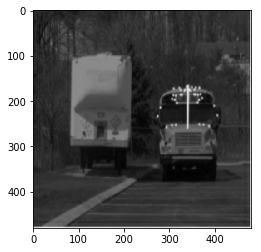

In [408]:
plt.imshow(img, cmap='gray')

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179.]
(480, 180)


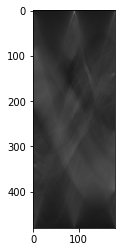

In [409]:
theta1 = np.linspace(0., 180., 180, endpoint=False)
print(theta1)
sinogram1 = radon(img, theta=theta1, circle=True)
plt.imshow(sinogram1, cmap='gray')
imsize = sinogram1.shape
print(imsize)

(480,)
[ 39562.  34008.  24140.  21481.  22082.  22436.  22763.  22759.  22717.
  22300.  21960.  21904.  21860.  21753.  21842.  22174.  22510.  22888.
  23003.  22994.  23005.  23042.  23455.  23846.  23325.  22955.  23153.
  23503.  24169.  24377.  23974.  23973.  24280.  24333.  24272.  24218.
  24176.  24367.  24581.  24617.  24555.  24043.  23528.  23031.  22914.
  23314.  23604.  23829.  24296.  24883.  25301.  25677.  25565.  25467.
  25840.  26174.  26296.  26289.  26032.  26076.  26507.  26840.  27070.
  27157.  27211.  27170.  27146.  27064.  27024.  26955.  26940.  27088.
  27164.  27000.  26524.  25579.  25070.  24892.  25357.  26111.  27287.
  28602.  31247.  34035.  37452.  40477.  41680.  42372.  41969.  41490.
  40913.  40883.  41301.  41622.  41989.  41897.  41746.  41809.  41907.
  42019.  42083.  41811.  41527.  41212.  40878.  40529.  40191.  39862.
  39448.  38979.  38499.  38051.  37970.  37964.  37930.  37940.  37979.
  38041.  38114.  38063.  37888.  37686.  37

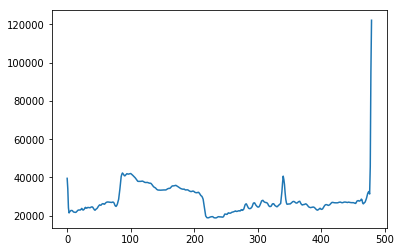

233


In [410]:
b = sinogram1[:,0]
# b[259] = b[259]*2
print(b.shape)
print(b)
print(np.mean(b))
plt.plot(b) # plotting by columns
plt.show()
min_idxb = np.argmin(b)
print(min_idxb)

In [418]:
min_angles = []
for k in range(180):
    
    b = sinogram1[:,k]
    conv_sz = [51,101,151]
    ans = np.zeros(np.shape(b)[0])
    for i in range(len(conv_sz)):
        for j in range(int(conv_sz[i]/2)):
            vec = np.zeros(conv_sz[i])
            vec[j] = 1 + j
            vec[conv_sz[i] - 1 -j] = -1-j
            ans = np.add(ans, abs(np.convolve(vec,b,mode='same')))
    center = np.argmin(ans)
    min_val = min(ans)
    if center < 240:# or center < 200:
        min_val = min_val * 100
        
    min_angles.append(min_val/len(conv_sz))
        
    print('angle: ',k,'Val: ',min_val/len(conv_sz),'At arg: ',center)
    # print(np.shape(ans))
#     print(np.argmin(ans))


angle:  0 Val:  1333725.3333333333 At arg:  392
angle:  1 Val:  1114984.6771932903 At arg:  395
angle:  2 Val:  1139863.0248249741 At arg:  395
angle:  3 Val:  1543670.2219922494 At arg:  393
angle:  4 Val:  1674188.7255034477 At arg:  342
angle:  5 Val:  1595071.7690286012 At arg:  343
angle:  6 Val:  1573565.053634852 At arg:  399
angle:  7 Val:  1475675.8984528268 At arg:  401
angle:  8 Val:  1390285.193157885 At arg:  343
angle:  9 Val:  1133558.1119808455 At arg:  342
angle:  10 Val:  1111437.8259199124 At arg:  341
angle:  11 Val:  109966006.18454035 At arg:  149
angle:  12 Val:  121387077.13681944 At arg:  151
angle:  13 Val:  140596517.52354577 At arg:  153
angle:  14 Val:  146083485.53916514 At arg:  156
angle:  15 Val:  1481968.1030630572 At arg:  345
angle:  16 Val:  1373743.9273755734 At arg:  345
angle:  17 Val:  1240073.6612107551 At arg:  346
angle:  18 Val:  1020807.4495377828 At arg:  347
angle:  19 Val:  872654.8966765106 At arg:  348
angle:  20 Val:  1079660.12839848

In [419]:
# print(min_angles)
print(np.argmin(min_angles))
# for h in range(180):
#     if min_angles[h]<91000:
#         print(h)
#         print(min_angles[h])

46


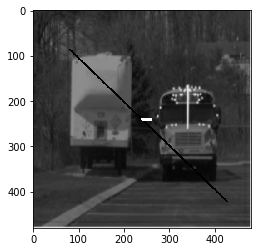

In [420]:
ang = 46
sym_pt = 254
img = np.copy(imgo)
img = cv2.resize(img,(480,480))
for i in range(1):    
    c0 = np.rint(240*np.cos(((180-ang)/180)*3.14)).astype(int)
    s0 = np.rint(240*np.sin(((180-ang)/180)*3.14)).astype(int)
#     print(s0)
#     print(c0)
    img = cv2.line(img,(sym_pt + s0,sym_pt - c0),(sym_pt - s0,sym_pt + c0),(0,0,0),4)
    img = cv2.line(img,(240,240),(260,240),(255,255,255),5)
    plt.imshow(img, cmap='gray')




In [249]:
sinogram1t = np.flipud(sinogram1)
diff = np.abs(sinogram1 - sinogram1t)
diff_col = np.mean(diff,axis=0)
print(diff_col)
print(np.shape(diff_col))
min_idx = np.argmin(diff_col)
print(min_idx)

[ 3109.7375      3015.0954607   4010.85762173  5209.89984142
  6354.99287346  7477.48275952  8545.36245849  9563.61205956
 10446.78056561 11197.63886501 11844.05245571 12288.1748177
 12549.60616101 12623.08206948 12541.60180851 12319.90443439
 12070.49977177 11794.59342487 11494.62723082 11224.10079881
 11024.51386832 10958.4604918  10952.42647759 10897.14849664
 10736.61763462 10473.32383645 10055.76857619  9600.53248496
  9161.68016524  8905.13025171  8717.16748254  8601.57370917
  8490.26146425  8264.16760094  8020.91208985  7802.62639572
  7618.31754983  7404.73244034  7128.27474627  6904.72049412
  6711.10847278  6496.69647937  6358.013449    6214.39714711
  6024.39035904  5800.28712223  5570.08204198  5524.74712784
  5346.39361627  5051.93070686  4767.31661941  4517.45457746
  4309.37252694  4053.03591965  3871.45935714  3834.31116726
  3761.96302709  3808.42944496  3760.63860638  3659.13517787
  3732.21599707  3734.65248404  3746.33832959  3695.61489825
  3554.68134118  3382.661

In [190]:
count = 0
d = np.zeros(30)
for i in range(1,179):
    if(diff_col[i] < diff_col[i-1] and diff_col[i] < diff_col[i+1] and diff_col[i]<diff_col[min_idx] *5):
        print(i)
        d[count]=i
        count=count+1;
print("count", count)

5
54
123
171
176
count 5


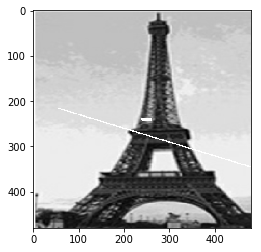

In [266]:
img = cv2.imread("../images/ball90.png",0)
ang = 73
sym_pt = 286
img = np.copy(imgo)
img = cv2.resize(img,(480,480))
for i in range(1):    
    c0 = np.rint(240*np.cos(((180-ang)/180)*3.14)).astype(int)
    s0 = np.rint(240*np.sin(((180-ang)/180)*3.14)).astype(int)
#     print(s0)
#     print(c0)
    img = cv2.line(img,(sym_pt + s0,sym_pt - c0),(sym_pt - s0,sym_pt + c0),(255,255,255),2)
    img = cv2.line(img,(240,240),(260,240),(255,255,255),5)
    plt.imshow(img, cmap='gray')




In [271]:
# img = np.copy(imgo)
# img = cv2.resize(img,(480,480))
# img = cv2.line(img,(240 + s0,240 - c0),(240 - s0,240 + c0),(0,0,0),5)
# img = cv2.line(img,(231,480),(231,0),(255,255,255),2)
# plt.imshow(img, cmap='gray')




In [61]:
a = [1, 2, 3, 4,3,2,3,5,6,7,1 ]
b = [1 ,0 ,-1]
c = np.convolve(a,b,mode='same')
print(c)

[ 2  2  2  0 -2  0  3  3  2 -5 -7]
